In [25]:
using DataFrames, WooldridgeDatasets, GLM, Plots

# Questão 04

## Item a

In [29]:
dados = DataFrame(wooldridge("BWGHT"))
first(dados, 6)

Row,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
,Float64,Float64,Float64,Int64,Int64?,Int64?,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64
1,13.5,16.5,122.3,109,12,12,1,1,1,0,4.69135,6.8125,0.0,2.60269
2,7.5,16.5,122.3,133,6,12,2,1,0,0,4.89035,8.3125,0.0,2.0149
3,0.5,16.5,122.3,129,missing,12,2,0,0,0,4.85981,8.0625,0.0,-0.693147
4,15.5,16.5,122.3,126,12,12,2,1,0,0,4.83628,7.875,0.0,2.74084
5,27.5,16.5,122.3,134,14,12,2,1,1,0,4.89784,8.375,0.0,3.31419
6,7.5,16.5,122.3,118,12,14,6,1,0,0,4.77068,7.375,0.0,2.0149


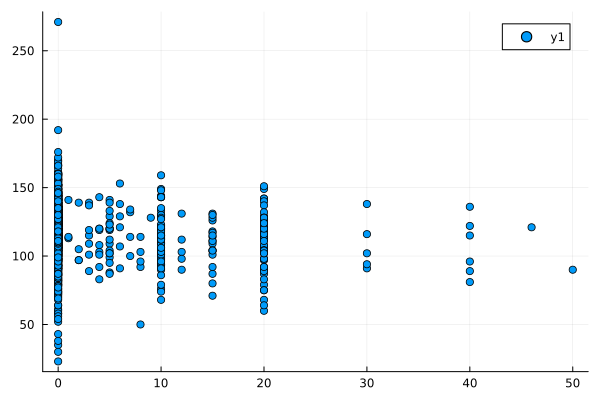

In [27]:
scatter(dados.cigs, dados.bwght)

In [18]:
modelo = lm(@formula(bwght ~ cigs), dados);
modelo

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

bwght ~ 1 + cigs

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  119.772      0.572341   209.27    <1e-99  118.649     120.895
cigs          -0.513772   0.0904909   -5.68    <1e-07   -0.691286   -0.336258
─────────────────────────────────────────────────────────────────────────────

In [19]:
betas = coef(modelo);

betas[1], betas[1] + betas[2] * 20

(119.7719003983497, 109.49645854188178)

## Item b

Não, pois as informações são foram obtidas de maneira observacional, e não experimental, dessa forma não é possível controlar as demais variáveis para que se mantenham cte, sem afetar qualquer relação de causa e efeito. Portanto, não é possível tomar este tipo de conclusão.

## Item c

$Y = β_0 + β_1X \implies X = (Y - β_0) / β_1$

In [20]:
(125 - betas[1]) / betas[2]

-10.175911994206754

## Item d

In [24]:
count(x -> x == 0, dados.cigs) / nrow(dados)

0.8472622478386167